# Deep Learning in Medicine
### BMSC-GA 4493, BMIN-GA 3007 
### Spring 2020
### Homework 1

**Learning Objectives**:

1. Basic Math Revision.
2. Introduction to Machine Learning.
3. Logistic Regression Model.
4. Multi-layer Perceptron Model.

**Instruction** 

1. If you need to write mathematical terms, you can type your answeres in a Markdown Cell via LaTex. See: <a href="https://stackoverflow.com/questions/13208286/how-to-write-latex-in-ipython-notebook">here</a> if you have issues with writing equations. To see basic LaTex notation see: <a href="https://en.wikibooks.org/wiki/LaTeX/Mathematics"> here </a>.

2. Upload and Submit your final jupyter notebook file in <a href='http://newclasses.nyu.edu '>newclasses.nyu.edu</a>

3. Deadline: Thursday Feb 20th 2020 (3pm) **

4. Questions and Clarification: <a href="https://piazza.com/nyumc.org/spring2020/bmscga4493andbminga3007/home"> Class Piazza</a>

5. ***HW submission instructions:*** Students should submit a zipped folder named netid_hwx where x is the hw number . The submission should consist of jupyter notebook with all the plots and expected outputs clearly visible in it. The zipped folder should also contain the data files. We should be able to run your ipynb without making directory changes. Not following the protocol might lead to deduction of scores.

---
# Question 1: Math and Machine Learning Revision (9 points)

### Take derivatives of functions from 1.1 to 1.5

### 1.1. (1 point)

$f(x) = e^{3x + 9}$

$\frac{df(x)}{dx} = 3e^{3x + 9}$

### 1.2. (1 point)

$f(x) = \sqrt{\sum_{i=1}^{5}(a_i x)}$

$\frac{df(x)}{dx} = \frac{\sum_{i=1}^{5}a_i}{2 \sqrt{\sum_{i=1}^{5}(a_i x)}}$

### 1.3. (1 point)

$f(x) = ln(2^x)$

$\frac{df(x)}{dx} = ln(2)$

### 1.4. (1 point)

$f(x) = ln(3^x * 9^x)$

$\frac{df(x)}{dx} = ln(3) + ln(9)$

### 1.5. (1 point)

$f(x) = ln(e^{2x +1})$

$\frac{df(x)}{dx} = 2$

### 1.6. Assume we have two coins. Imagine the first coin is fair and has a probability distribution P, where P(head) = 0.5 and P(tail) = 0.5. Assume second coin is not fair and has a different distribution Q, where Q(head)=0.1 and Q(tail)=0.9. 

#### 1.6.a. What is entropy of P distribution? (1 point)
#### 1.6.b. What is entropy of Q distribution? (1 point)
#### 1.6.c. What is cross-entropy between P and Q i.e. CE(P,Q)? (1 point)
#### 1.6.d. What is the cross-entropy between Q and P i.e. CE(Q,P)? (1 point)


Entropy of bernoulli distribution: $H(x)=-plog_{2}p -(1-p)log_{2}(1-p)$

a. Entropy of P distribution: 1

b. Entropy of Q distribution: 0.4690

Cross-entropy between two bernoulli distribution: $H(p,q)=-plog_{2}q -(1-p)log_{2}(1-q)$

c. Cross-entropy between P and Q: 1.7370

d. Cross-entropy between Q and P: 1


---
# Question 2: Solving Linear Regression via Mean Squared Error (MSE) Optimization Problem (30 points)

Imagine that you have measured two variables X and Y, for a simple task, and you belive that they might be linearly related to each other. Here, our input X has 2 dimensions, and the output has 1 dimension. We will use super-script to indicate which sample it is, and sub-scipt to indicate which dimension it is. 
The measurements are as follows:

###### (Training data D = {($X^1$, $Y^1$), ($X^2$, $Y^2$), ($X^3$, $Y^3$)})

Sample 1: $X^1 = (x_1^1, x_2^1) = (2, 2)$,   $Y^1$ = 5

Sample 2: $X^2 = (x_1^2, x_2^2) = (2, 7)$,   $Y^2$ = 3

Sample 3: $X^3 = (x_1^3, x_2^3) = (-1, 0)$,   $Y^3$ = 1



If we assume that the relationship between X and Y is linear, we can write this relationship as:

$Y = f_{W,B}(X) = WX + B = w_1*x_1 + w_2*x_2 + B$

where $W = (w_1, w_2)$ and $B$ are the parameters of the model.	
We are interested in finding best values for W and B.	
We define 'best' in terms of a loss function between $f_{W,b}(X_i)$ and $Y_i$ for each ($X_i$ and $Y_i$) in the training data. 	
Since $Y_i$s are real numbers, let's consider Mean Squared Error loss. 

Remember that Mean Squared Error for this function, over training data, and W and B is:

$MSELoss(D={(X_1, Y_1), (X_2, Y_2), (X_3, Y_3)}), W, B) = \frac{1}{3}\sum_{i=1}^{3} (f_{W,B}(X_i) - Y_i)^2 $

### 2.1. (6 points)
Compute the partial derivative of $MESLoss(D, W, B)$, With respect to W and B.	
Remember that $X_1$, $X_2$, $X_3$, $Y_1$, $Y_2$, and $Y_3$ are constants, and already given to us as training data
above.

$MSELoss(D, W, B) = \frac{1}{3}[(2w_1+2w_2+B-5)^2 + (2w_1+7w_2+B-3)^2 + (-w_1+B-1)^2] $

$\frac{d}{d w_1} MSELoss(D, W, B) = 6w_1+12w_2+2B-10$

$\frac{d}{d w_2} MSELoss(D, W, B) = 12w_1+\frac{106}{3}w_2+6B-\frac{62}{3}$

$\frac{d}{d B} MSELoss(D, W, B) = 2w_1+6w_2+2B-6$

### 2.2. (6 points)
Use matplotlib library and plot $\frac{d}{d w1} MSELoss(D, W, B)$ for $w_1 = np.arange(0, 3, 0.5)$, when $w_2$ equals 1, and B equals to -5.

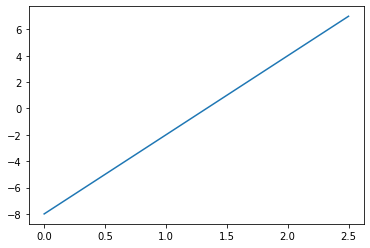

In [11]:
import matplotlib.pyplot as plt
import numpy as np
w1 = np.arange(0, 3, 0.5)
# plot dMSELoss/dw1 here:
w2 = 1
B = -5
dMSELoss_dw1 = 6*w1 + 12*w2 + 2*B -10
fig = plt.figure()
plt.plot(w1,dMSELoss_dw1)
plt.show()

### 2.3. (6 points)
What values of $w_1$, $w_2$ and $B$, make all partial derivatives zero?

$w_1=1.6$, $w_2=-0.4$, $B=2.6$

### 2.4. (6 points)
If you start from an initial point $w_1^0 = 0.1$ , $w_2^0 = 0.1$ and $B^0 = 0.1$, and iteratively update your $w_1$, $w_2$, and B via gradient descent as follows:
    
$ w_1^{t+1} = w_1^t - 0.01 * \frac{d}{d w_1} MSELoss(D, W, B) |_{w_1^t,w_2^t,B^t} $	
$ w_2^{t+1} = w_2^t - 0.01 * \frac{d}{d w_2} MSELoss(D, W, B) |_{w_1^t,w_2^t,B^t} $	
$ B^{t+1} = B^t - 0.01 * \frac{d}{d B} MSELoss(D, W, B) |_{w_1^t,w_2^t,B^t} $	
(Note: This is gradient descent with a 0.01 learning rate.)

What are the values of Ws and B over iterations 0 to 50? (Don't compute by hand! Write a code!)	
Write a python script that computes these values for 50 iterations, i.e. lists of $\{w_1^0, w^1_1,.., w_1^{50}\}$, $\{w_2^0, w_2^1,.., w_2^{50}\}$, and $\{B^0, B^1,.., B^{50}\}$.	
Plot the lists of $w_1$s, $w_2$s and Bs over 50 iterations.



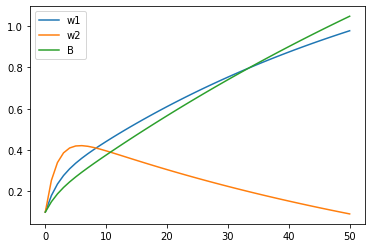

In [2]:
w1 = 0.1
w2 = 0.1
B = 0.1
w1_list = [w1]
w2_list = [w2]
B_list = [B]
for iterations in range(50):
    dMSELoss_dw1 = 6*w1 + 12*w2 + 2*B - 10
    dMSELoss_dw2 = 12*w1 + (106/3)*w2 + 6*B - (62/3)
    dMSELoss_dB = 2*w1 + 6*w2 + 2*B - 6
    w1 = w1 - 0.01*dMSELoss_dw1
    w2 = w2 - 0.01*dMSELoss_dw2
    B = B - 0.01*dMSELoss_dB
    w1_list.append(w1)
    w2_list.append(w2)
    B_list.append(B)
fig, ax = plt.subplots()
line1, = ax.plot(w1_list,label='w1')
line2, = ax.plot(w2_list,label='w2')
line3, = ax.plot(B_list,label='B')
ax.legend()
plt.show()

### 2.5. (6 points)
Now that you learned the math and made the code yourself, we will use pytorch and automatic differentiation, to find optimal W and B!	
Again, consider data to be D = {($X_1$, $Y_1$), ($X_2$, $Y_2$), ($X_3$, $Y_3$)}) = {((2,2), 5), ((2,7), 3), ((-1,0), 1)}.

Some of your steps are here. Fill in the rest and show a plot of the loss function, $w_1$, $w_2$ and B over these 10 epochs.

data X is: [(2, 2), (2, 7), (-1, 0)]
data Y is: [5, 3, 1]


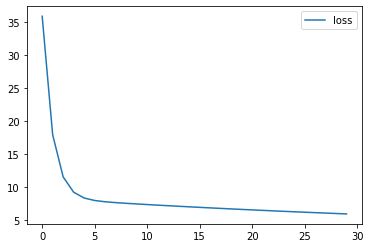

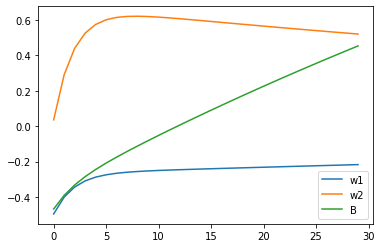

In [3]:
import torch
import torch.nn as nn
import numpy as np
from torch import optim

D = [((2,2), 5), ((2,7), 3), ((-1,0), 1)]
X = [d[0] for d in D]
Y = [d[1] for d in D]
print('data X is:', X)
print('data Y is:', Y)

model = torch.nn.Linear(2, 1, bias=True)
optimizer = optim.SGD(model.parameters(), lr=0.01)
loss = torch.nn.MSELoss()

losslist = []
w1list = []
w2list = []
blist = []

# for epoch in range(10):
    # Shuffle your training data samples
    # Loop over your training data in the new order:
        #dont forget to: optimizer.zero_grad()
        #prepare your x_input and y_target if needed
        #send the data through your model: i.e. pred_i = model(x_input)
        #send the prediction through the loss function too: i.e. lossout= loss(pred_i, y_target)
        #call backward to back-propagate: i.e. lossout.backward()
        #call optimizer.step() to update the model parameters based on the computed gradients
        #keep the w1s, w2s, and bs, and loss value some list so you can plot them later

from random import shuffle
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
for epoch in range(10):
    shuffle(D)
    for i in range(len(D)):
        optimizer.zero_grad()
        x_input = [d[0] for d in D]
        x_input = torch.tensor(x_input).float()
        y_input = [d[1] for d in D]
        y_target = torch.tensor(y_input).float()
        pred_i = model(x_input)
        lossout = loss(pred_i, y_target)
        lossout.backward()
        optimizer.step()
        losslist.append(lossout)
        w1list.append(model.weight.data[0].data[0].item())
        w2list.append(model.weight.data[0].data[1].item())
        blist.append(model.bias.item())

#plot the losslist, w1s, w2s, and bs.
fig, ax = plt.subplots()
line1, = ax.plot(losslist,label='loss')
ax.legend()
plt.show()

fig, ax = plt.subplots()
line1, = ax.plot(w1list,label='w1')
line2, = ax.plot(w2list,label='w2')
line3, = ax.plot(blist,label='B')
ax.legend()
plt.show()        


# Question 3: Learning Curves, Overfitting, and Machine Learning! (61 points)

Now we know how to optimize, let's get some real machine learning done!	

Instead of the small dataset we had in questions 2 and 3, now let's use the the CBIS-DDSM (Curated Breast Imaging Subset of DDSM) dataset from <a href="https://wiki.cancerimagingarchive.net/display/Public/CBIS-DDSM#385f2cd4e86f4142b1d32bdb5803bd96"> here</a>


In this homework, we will *only* focus on the following items in the dataset:	
Mass-Training-Description (csv)	
Mass-Test-Description (csv)	
(Don't download the images on your laptop! That file is too big and we deal with it on the cluster later!)

This dataset contains several features related to Mammography and detection of breast cancer. 

The Mass-Training-Description and Mass-Test-Description include these columns:

patient_id	
breast_density	
left or right breast	
image view		
abnormality id		
abnormality type	
mass shape	
mass margins	
assessment	
pathology

There is more data in this dataset, including images, but for this homework we will not focus on them.

We are interested in this question:	
Using variables:	

breast_density	
left or right breast	
image view		
abnormality id		
abnormality type	
mass shape	
mass margins	

How well can we predict the **pathology type**?

We can answer that by training a model on the Mass-Training-Description, and evaluating it on Mass-Test-Description. 
See questions 3.1 and 3.2



### 3.1. (10 points)
Write a script to prepare input [breast_density, left or right breast, image view, abnormality id,
abnormality type, mass shape, mass margins] and output [pathology type].

The output of your script should be a matrix X and a vector Y, where each row of X are one set of variables for a patient, and each row of Y is the pathology type class, for that patient.	

Use *matplotlib.imshow* to visualize the X.	
(And if there are multiple equivalent rows per patient, keep only one of them - any, up to you)


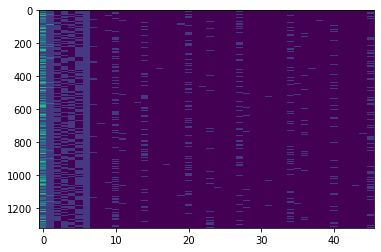

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

train = pd.read_csv('mass_case_description_train_set.csv', sep=',')
test = pd.read_csv('mass_case_description_test_set.csv', sep=',')
train = train[['patient_id','breast_density','left or right breast','image view',\
               'abnormality id','abnormality type','mass shape','mass margins','pathology']]
test = test[['patient_id','breast_density','left or right breast','image view',\
             'abnormality id','abnormality type','mass shape','mass margins','pathology']]
train_list = []
for i in range(train.shape[0]):
    train_list.append('train'+str(i))
train['patient_id'] = train_list
test_list = []
for i in range(test.shape[0]):
    test_list.append('test'+str(i))
test['patient_id'] = test_list
df = pd.concat([train,test])
df = df.set_index('patient_id')
df_X = df.drop(['pathology'],axis=1)
df_X = pd.get_dummies(df_X)
df_Y = df[['pathology']]
df_Y = pd.get_dummies(df_Y)
X = df_X.loc[train_list].values
Y = df_Y.loc[train_list].values
plt.imshow(X,aspect='auto')

### 3.2. (5 points)
Repeat Question 3.1 for the test set - remember to make sure you have same number of columns for test and train set!
Use matplotlib.imshow(xtest, aspect='auto') to show the x dataset

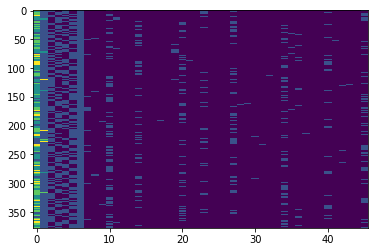

In [5]:
x = df_X.loc[test_list].values
y = df_Y.loc[test_list].values
plt.imshow(x,aspect='auto')

### 3.3. Logistic Regression (15 points)


### 3.3.a.

Design a multi-class logistic regression model which takes the input and outputs the probability of 3 classes. 

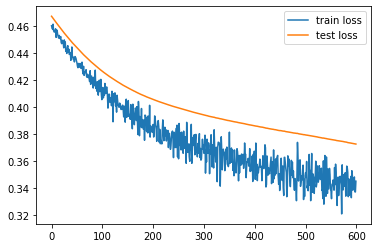

In [6]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
from torch import optim
from random import shuffle
input_dim = X.shape[1]
output_dim = Y.shape[1]
lr_rate = 0.01
Epochs = 100
Batch_Size = 200
Iterations = int(X.shape[0]/Batch_Size)

class LogisticRegression(torch.nn.Module):
    def __init__(self, input_dim, output_dim):
        super(LogisticRegression, self).__init__()
        self.linear = torch.nn.Linear(input_dim, output_dim)
    def forward(self, x):
        return F.softmax(self.linear(x),dim=1)

model = LogisticRegression(input_dim,output_dim)
optimizer = optim.SGD(model.parameters(), lr=lr_rate)
loss = torch.nn.L1Loss()
D = []
for i in range(len(X)):
    D.append((tuple(X[i]),tuple(Y[i])))
D_test = []
for i in range(len(x)):
    D_test.append((tuple(x[i]),tuple(y[i])))
losslist = []
loss_test_list = []

for epoch in range(Epochs):
    shuffle(D)
    for i in range(Iterations):
        Data = D[i*Batch_Size:(i+1)*Batch_Size]
        x_input = [d[0] for d in Data]
        x_input = torch.tensor(x_input).float()
        y_input = [d[1] for d in Data]
        y_input = torch.tensor(y_input).float()
        optimizer.zero_grad()
        pred_i = model(x_input)
        lossout = loss(pred_i, y_input)
        losslist.append(lossout)
        x_test = [d[0] for d in D_test]
        x_test = torch.tensor(x_test).float()
        y_test = [d[1] for d in D_test]
        y_test = torch.tensor(y_test).float()
        pred_test = model(x_test)
        loss_test = loss(pred_test, y_test)
        loss_test_list.append(loss_test)
        lossout.backward()
        optimizer.step()
fig, ax = plt.subplots()
line1, = ax.plot(losslist,label='train loss')
line2, = ax.plot(loss_test_list,label='test loss')
ax.legend()
plt.show() 

### 3.3.b.
What are the sizes for your input and output?

In [7]:
x_input.shape[1]

46

In [8]:
pred_i.shape[1]

3

### 3.3.c.
What type of activation function you will use and why?

Softmax, because the prediction result is single state, the sum of 3 classes probability need to be 1.

### 3.3.d.
How many parameters you need to fit for your design?

$46\times3+3$ parameters

### 3.4. Multi-layered-perceptron (15 points)

Design a multi layer perceptron (MLP) with a single hidden layer which first maps the vectorized image to a vector of 100 then feeds this vector to a fully connected layer to get the probability of 3 classes.

You can choose optimizer and criterion of interest.

Plot the ***average loss on all the train samples*** per epoch. (Stop the training after 1000 epochs). 



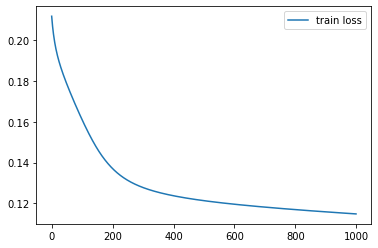

In [9]:
class Network(nn.Module):
    def __init__(self, in_dim, n_hidden_1, out_dim):
        super(Network, self).__init__()
        self.layer1 = nn.Linear(in_dim, n_hidden_1)
        self.layer2 = nn.Linear(n_hidden_1, out_dim)
    def forward(self, x):
        x = self.layer1(x)
        x = F.relu(x)
        x = self.layer2(x)
        return F.softmax(x,dim=1)

input_dim = X.shape[1]
output_dim = Y.shape[1]
n_hidden_1 = 100
lr_rate = 0.1
Epochs = 1000
Batch_Size = X.shape[0]
Iterations = int(X.shape[0]/Batch_Size)
model = Network(input_dim, n_hidden_1, output_dim)
loss = torch.nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=lr_rate)
D = []
for i in range(len(X)):
    D.append((tuple(X[i]),tuple(Y[i])))
loss_avg_list = []
for epoch in range(Epochs):
    shuffle(D)
    losslist = []
    for i in range(Iterations):
        Data = D[i*Batch_Size:(i+1)*Batch_Size]
        x_input = [d[0] for d in Data]
        x_input = torch.tensor(x_input).float()
        y_input = [d[1] for d in Data]
        y_input = torch.tensor(y_input).float()
        optimizer.zero_grad()
        pred_i = model(x_input)
        lossout = loss(pred_i, y_input)
        losslist.append(float(lossout))
        lossout.backward()
        optimizer.step()
    loss_avg_list.append(np.mean(losslist))
fig, ax = plt.subplots()
line1, = ax.plot(loss_avg_list,label='train loss')
ax.legend()
plt.show()

### 3.5. (10 points)
Add the loss of the test set to the loss of the train set and plot the ***average loss on all the test samples*** per epoch. (Stop the training after 100 epochs)

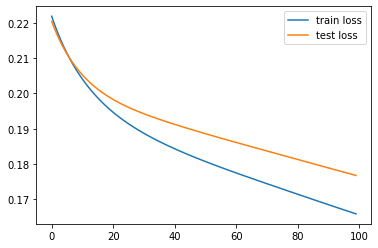

In [10]:
Epochs = 100
D = []
model = Network(input_dim, n_hidden_1, output_dim)
loss = torch.nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=lr_rate)
for i in range(len(X)):
    D.append((tuple(X[i]),tuple(Y[i])))
loss_avg_list = []
D_test = []
for i in range(len(x)):
    D_test.append((tuple(x[i]),tuple(y[i])))
test_loss_avg_list = []
for epoch in range(Epochs):
    shuffle(D)
    losslist = []
    test_losslist = []
    for i in range(Iterations):
        Data = D[i*Batch_Size:(i+1)*Batch_Size]
        x_input = [d[0] for d in Data]
        x_input = torch.tensor(x_input).float()
        y_input = [d[1] for d in Data]
        y_input = torch.tensor(y_input).float()
        optimizer.zero_grad()
        pred_i = model(x_input)
        lossout = loss(pred_i, y_input)
        losslist.append(float(lossout))
        x_test = [d[0] for d in D_test]
        x_test = torch.tensor(x_test).float()
        y_test = [d[1] for d in D_test]
        y_test = torch.tensor(y_test).float()
        pred_test = model(x_test)
        loss_test = loss(pred_test, y_test)
        test_losslist.append(float(loss_test))
        lossout.backward()
        optimizer.step()
    loss_avg_list.append(np.mean(losslist))
    test_loss_avg_list.append(np.mean(test_losslist))
fig, ax = plt.subplots()
line1, = ax.plot(loss_avg_list,label='train loss')
line2, = ax.plot(test_loss_avg_list,label='test loss')
ax.legend()
plt.show()

### 3.6. (3 points)
Define two types of activation functions you can use in the first layer. Which activation function you will use on the second fully connected layer?

Two activation functions can be used in the first layer:

F.relu(self.layer1(x))

F.sigmoid(self.layer1(x))

Activation function on the second fully connected layer:

F.softmax(x,dim=1)

### 3.7. (3 points)
How many parameters you need to fit for your design? How does adding another hidden layer effected the number of parameters to use?

Number of fit parameters: $46\times100+100\times3+100+3$

If another hidden layer with N neurons is added, number of fit parameters will be $46\times100 + 100\times N + N\times 3$.